In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [5]:
df = pd.read_csv("1.student_data.csv")

# Prepare the features (Attendance, Performance) and target (Likely_Dropout)

In [6]:
X = df[["Attendance", "Performance"]]
y = df["Likely_Dropout"]


# Split the data into training and test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (KNN performs better with standardized data)

---



In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement the KNN classifier with 3 neighbors (k=3)

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

# Make predictions on the test set

In [10]:
y_pred = knn.predict(X_test_scaled)

# Display classification report to evaluate the model

In [18]:
report = classification_report(y_test, y_pred)
print("RegNo.21BBS0166")
print(report)

RegNo.21BBS0166
              precision    recall  f1-score   support

       False       0.57      0.57      0.57         7
        True       0.40      0.40      0.40         5

    accuracy                           0.50        12
   macro avg       0.49      0.49      0.49        12
weighted avg       0.50      0.50      0.50        12



# Display the predicted classifications along with the students' information

In [12]:
predicted_df = X_test.copy()
predicted_df["Actual_Likely_Dropout"] = y_test.values
predicted_df["Predicted_Likely_Dropout"] = y_pred

# Merge the predicted values with the original dataset to include Student_ID and Subject

In [17]:
result_df = df.loc[predicted_df.index, ["Student_ID", "Subject"]].copy()
result_df["Actual_Likely_Dropout"] = y_test.values
result_df["Predicted_Likely_Dropout"] = y_pred
print("RegNo.21BBS0166")
print(result_df)

RegNo.21BBS0166
    Student_ID             Subject  Actual_Likely_Dropout  \
0            1   Information Audit                  False   
5            6   Information Audit                   True   
36          37         Data Mining                  False   
45          46          Modern Web                   True   
13          14   Information Audit                  False   
54          55         Data Mining                   True   
33          34   Information Audit                  False   
48          49  Service Management                   True   
12          13   Information Audit                   True   
57          58  Service Management                  False   
46          47          Modern Web                  False   
50          51         Data Mining                  False   

    Predicted_Likely_Dropout  
0                      False  
5                      False  
36                      True  
45                     False  
13                     False  
54  

# Display the confusion matrix

In [15]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[4 3]
 [3 2]]


# Plot the student performance classification for the test set

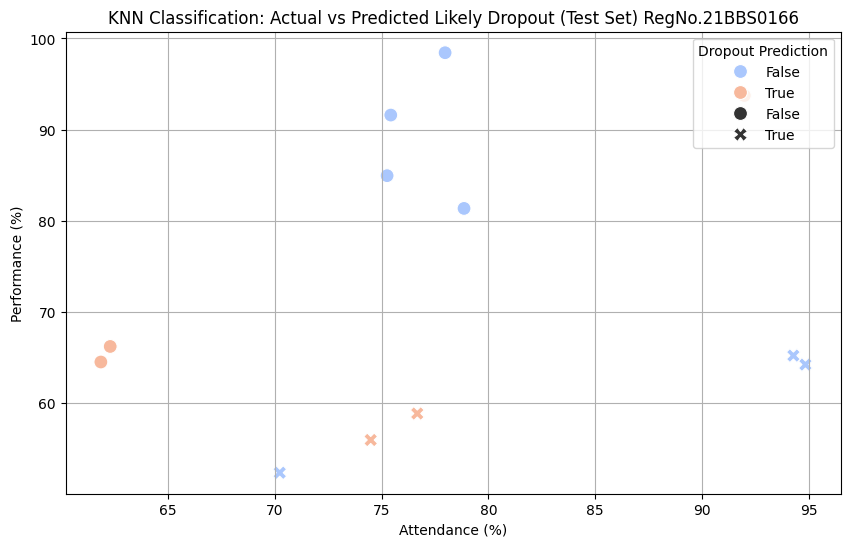

In [20]:
  plt.figure(figsize=(10, 6))
  sns.scatterplot(x=X_test["Attendance"], y=X_test["Performance"], hue=y_test, style=y_pred, palette="coolwarm", s=100)
  plt.title("KNN Classification: Actual vs Predicted Likely Dropout (Test Set) RegNo.21BBS0166")
  plt.xlabel("Attendance (%)")
  plt.ylabel("Performance (%)")
  plt.legend(title="Dropout Prediction", loc="upper right")
  plt.grid(True)
  plt.show()

# Classify the students into "Drop", "Fail", and "Pass" based on certain criteria

In [21]:
  pass_fail_threshold = 40  # Performance below 40 is fail
  drop_threshold = 75  # Attendance below 75 is dropout

# Generate classifications based on thresholds

In [22]:
def classify_student(attendance, performance):
    if attendance < drop_threshold:
        return "Drop"
    elif performance < pass_fail_threshold:
        return "Fail"
    else:
        return "Pass"

# Apply the classification to the dataset

In [23]:
df["Classification"] = df.apply(lambda row: classify_student(row["Attendance"], row["Performance"]), axis=1)

# Count the number of students in each classification

In [24]:
drop_students = df[df["Classification"] == "Drop"]
fail_students = df[df["Classification"] == "Fail"]
pass_students = df[df["Classification"] == "Pass"]

# Display the detailed classification of each student

In [25]:
for index, row in df.iterrows():
    print(f"Roll Number: {row['Student_ID']}, Classification: {row['Classification']}")

Roll Number: 1, Classification: Pass
Roll Number: 2, Classification: Pass
Roll Number: 3, Classification: Drop
Roll Number: 4, Classification: Pass
Roll Number: 5, Classification: Drop
Roll Number: 6, Classification: Drop
Roll Number: 7, Classification: Pass
Roll Number: 8, Classification: Pass
Roll Number: 9, Classification: Drop
Roll Number: 10, Classification: Pass
Roll Number: 11, Classification: Pass
Roll Number: 12, Classification: Pass
Roll Number: 13, Classification: Pass
Roll Number: 14, Classification: Pass
Roll Number: 15, Classification: Drop
Roll Number: 16, Classification: Drop
Roll Number: 17, Classification: Pass
Roll Number: 18, Classification: Pass
Roll Number: 19, Classification: Pass
Roll Number: 20, Classification: Drop
Roll Number: 21, Classification: Drop
Roll Number: 22, Classification: Pass
Roll Number: 23, Classification: Pass
Roll Number: 24, Classification: Pass
Roll Number: 25, Classification: Pass
Roll Number: 26, Classification: Drop
Roll Number: 27, Clas

# Summarize the classification results

In [26]:
print(f"\nTotal students at risk of dropping out: {len(drop_students)}")
print(f"Total failing students: {len(fail_students)}")
print(f"Total passing students: {len(pass_students)}")


Total students at risk of dropping out: 23
Total failing students: 0
Total passing students: 37
